# RNN

In [107]:
#import packages, load data
import numpy as np
import pandas as pd
import sklearn
import talib as tb
import tensorflow as tf
import matplotlib.pyplot as plt

In [108]:
#CSI300 index data
df = pd.read_csv('../data/000300.csv')

#add label column, 1:up/-1:down
df['label'] = 0
for i in range(len(df) - 1):
    if df.loc[i + 1]['close'] >= df.loc[i]['close']:
        df.loc[i, 'label'] = 1
    else:
        df.loc[i, 'label'] = -1
df.loc[len(df) - 1, 'label'] = 1

print(df.shape)
df.head(20)

(2507, 8)


,date,open,close,high,low,total_turnover,volume,label
0,2007-04-02,2793.9570,2850.1069,2850.1521,2793.9570,7.668051e+10,6.924788e+09,1
1,2007-04-03,2861.8979,2888.1150,2888.3291,2852.5710,8.709185e+10,7.701450e+09,1
2,2007-04-04,2893.3770,2911.8210,2924.6760,2875.6851,8.845607e+10,7.550666e+09,1
3,2007-04-05,2909.5000,2945.0449,2950.6589,2895.4160,8.519560e+10,7.413899e+09,1
4,2007-04-06,2921.7271,2972.0081,2977.4590,2911.0520,9.304957e+10,7.910233e+09,1
5,2007-04-09,2988.3770,3038.1721,3043.0601,2988.3770,1.062188e+11,9.090170e+09,1
6,2007-04-10,3053.3550,3081.5681,3081.6169,2993.1140,1.197022e+11,1.008883e+10,1
7,2007-04-11,3092.0850,3121.3191,3121.5371,3059.2830,1.242189e+11,1.016699e+10,1
8,2007-04-12,3129.2471,3176.4370,3176.6899,3114.9109,1.184341e+11,9.253519e+09,-1
9,2007-04-13,3182.7771,3169.2329,3211.6069,3154.1060,1.297284e+11,1.006531e+10,1


 1    1325
-1    1182
Name: label, dtype: int64


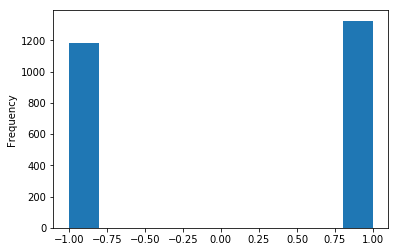

In [109]:
#plot the distribution of labels
print(df['label'].value_counts())
df['label'].astype(int).plot.hist()

## Add some features

In [110]:
#ma12, ma26, ma60 and some feature cross
ma12 = tb.EMA(np.array(df['close']), timeperiod = 12)
ma26 = tb.EMA(np.array(df['close']), timeperiod = 26)
ma60 = tb.EMA(np.array(df['close']), timeperiod = 60)

ma12_ma26 = (ma12 > ma26).astype(int)
ma26_ma60 = (ma26 > ma60).astype(int)
ma12_ma26_ma60 = np.bitwise_and(ma12_ma26, ma26_ma60)
ma60_ma26_ma12 = np.bitwise_and(ma12 < ma26, ma26 < ma60).astype(int)

df.insert(len(df.columns), 'ma12', ma12)
df.insert(len(df.columns), 'ma26', ma26)
df.insert(len(df.columns), 'ma60', ma60)
df.insert(len(df.columns), 'ma12>ma26', ma12_ma26)
df.insert(len(df.columns), 'ma26>ma60', ma26_ma60)
df.insert(len(df.columns), 'ma12>ma26>ma60', ma12_ma26_ma60)
df.insert(len(df.columns), 'ma12<ma26<ma60', ma60_ma26_ma12)

df.head(100)

/usr/local/Cellar/ipython/6.3.1/libexec/vendor/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  
/usr/local/Cellar/ipython/6.3.1/libexec/vendor/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys
/usr/local/Cellar/ipython/6.3.1/libexec/vendor/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


,date,open,close,high,low,total_turnover,volume,label,ma12,ma26,ma60,ma12>ma26,ma26>ma60,ma12>ma26>ma60,ma12<ma26<ma60
0,2007-04-02,2793.9570,2850.1069,2850.1521,2793.9570,7.668051e+10,6.924788e+09,1,NaN,NaN,NaN,0,0,0,0
1,2007-04-03,2861.8979,2888.1150,2888.3291,2852.5710,8.709185e+10,7.701450e+09,1,NaN,NaN,NaN,0,0,0,0
2,2007-04-04,2893.3770,2911.8210,2924.6760,2875.6851,8.845607e+10,7.550666e+09,1,NaN,NaN,NaN,0,0,0,0
3,2007-04-05,2909.5000,2945.0449,2950.6589,2895.4160,8.519560e+10,7.413899e+09,1,NaN,NaN,NaN,0,0,0,0
4,2007-04-06,2921.7271,2972.0081,2977.4590,2911.0520,9.304957e+10,7.910233e+09,1,NaN,NaN,NaN,0,0,0,0
5,2007-04-09,2988.3770,3038.1721,3043.0601,2988.3770,1.062188e+11,9.090170e+09,1,NaN,NaN,NaN,0,0,0,0
6,2007-04-10,3053.3550,3081.5681,3081.6169,2993.1140,1.197022e+11,1.008883e+10,1,NaN,NaN,NaN,0,0,0,0
7,2007-04-11,3092.0850,3121.3191,3121.5371,3059.2830,1.242189e+11,1.016699e+10,1,NaN,NaN,NaN,0,0,0,0
8,2007-04-12,3129.2471,3176.4370,3176.6899,3114.9109,1.184341e+11,9.253519e+09,-1,NaN,NaN,NaN,0,0,0,0
9,2007-04-13,3182.7771,3169.2329,3211.6069,3154.1060,1.297284e+11,1.006531e+10,1,NaN,NaN,NaN,0,0,0,0


In [111]:
print(df['ma12>ma26'].value_counts())
print(df['ma26>ma60'].value_counts())
print(df['ma12>ma26>ma60'].value_counts())
print(df['ma12<ma26<ma60'].value_counts())

correlations = df.corr()['label'].sort_values()
print(correlations)

1    1290
0    1217
Name: ma12>ma26, dtype: int64
0    1327
1    1180
Name: ma26>ma60, dtype: int64
0    1539
1     968
Name: ma12>ma26>ma60, dtype: int64
0    1527
1     980
Name: ma12<ma26<ma60, dtype: int64
ma12<ma26<ma60   -0.039220
ma60              0.004967
ma26              0.017156
ma12              0.023750
low               0.028049
open              0.028534
close             0.029297
ma26>ma60         0.030971
high              0.031132
ma12>ma26         0.041903
total_turnover    0.045399
ma12>ma26>ma60    0.048241
volume            0.051976
label             1.000000
Name: label, dtype: float64


BOLL, SAR, MACD, StochRSI, RSI, DMI, OBV, TRIX, WR

In [112]:
#MACD
dif, dem, hist = tb.MACD(np.array(df['close']), fastperiod = 12, slowperiod = 26, signalperiod = 9)
df.insert(len(df.columns), 'macd_dif', dif)
df.insert(len(df.columns), 'macd_dem', dem)
df.insert(len(df.columns), 'macd_hist', hist)

#kdj
k, d = tb.STOCH(np.array(df['high']), np.array(df['low']), np.array(df['close']))
j = 3 * d - 2 * k
df.insert(len(df.columns), 'kdj_k', k)
df.insert(len(df.columns), 'kdj_d', d)
df.insert(len(df.columns), 'kdj_j', j)

#atr
atr = tb.ATR(np.array(df.high), np.array(df.low), np.array(df.close), timeperiod = 15)
df.insert(len(df.columns), 'atr', atr)
df.head(100)

,date,open,close,high,low,total_turnover,volume,label,ma12,ma26,...,ma26>ma60,ma12>ma26>ma60,ma12<ma26<ma60,macd_dif,macd_dem,macd_hist,kdj_k,kdj_d,kdj_j,atr
0,2007-04-02,2793.9570,2850.1069,2850.1521,2793.9570,7.668051e+10,6.924788e+09,1,NaN,NaN,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2007-04-03,2861.8979,2888.1150,2888.3291,2852.5710,8.709185e+10,7.701450e+09,1,NaN,NaN,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2007-04-04,2893.3770,2911.8210,2924.6760,2875.6851,8.845607e+10,7.550666e+09,1,NaN,NaN,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2007-04-05,2909.5000,2945.0449,2950.6589,2895.4160,8.519560e+10,7.413899e+09,1,NaN,NaN,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2007-04-06,2921.7271,2972.0081,2977.4590,2911.0520,9.304957e+10,7.910233e+09,1,NaN,NaN,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2007-04-09,2988.3770,3038.1721,3043.0601,2988.3770,1.062188e+11,9.090170e+09,1,NaN,NaN,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2007-04-10,3053.3550,3081.5681,3081.6169,2993.1140,1.197022e+11,1.008883e+10,1,NaN,NaN,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2007-04-11,3092.0850,3121.3191,3121.5371,3059.2830,1.242189e+11,1.016699e+10,1,NaN,NaN,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2007-04-12,3129.2471,3176.4370,3176.6899,3114.9109,1.184341e+11,9.253519e+09,-1,NaN,NaN,...,0,0,0,NaN,NaN,NaN,99.928230,99.059817,97.322990,NaN
9,2007-04-13,3182.7771,3169.2329,3211.6069,3154.1060,1.297284e+11,1.006531e+10,1,NaN,NaN,...,0,0,0,NaN,NaN,NaN,93.608721,97.547191,105.424132,NaN


In [113]:
#BOLL
up, mid, down = tb.BBANDS(np.array(df['close']), timeperiod=15, nbdevup=1, nbdevdn=1, matype=0)
df.insert(len(df.columns), 'boll_up', up)
df.insert(len(df.columns), 'boll_mid', mid)
df.insert(len(df.columns), 'boll_down', down)

#SAR
sar = tb.SAR(np.array(df['high']), np.array(df['low']))
sar[0] = sar[1]
df.insert(len(df.columns), 'sar', sar)

#RSI
rsi = tb.RSI(np.array(df['close']), timeperiod = 15)
df.insert(len(df.columns), 'rsi', rsi)

#StochRSI
fastk, fastd = tb.STOCHRSI(np.array(df['close']), timeperiod = 15, fastk_period = 5, fastd_period = 3, fastd_matype=0)
df.insert(len(df.columns), 'stochrsi_k', fastk)
df.insert(len(df.columns), 'stochrsi_d', fastd)

#DMI
dmi = tb.DX(np.array(df['high']), np.array(df['low']), np.array(df['close']), timeperiod = 15)
df.insert(len(df.columns), 'dmi', dmi)

#OBV
obv = tb.OBV(np.array(df['close']), np.array(df['volume']))
df.insert(len(df.columns), 'obv', obv)

#TRIX
trix = tb.TRIX(np.array(df['close']), timeperiod = 15)
df.insert(len(df.columns), 'trix', trix)

#WR
wr = tb.WILLR(np.array(df['high']), np.array(df['low']), np.array(df['close']), timeperiod = 15)
df.insert(len(df.columns), 'wr', wr)
df.head(100)

,date,open,close,high,low,total_turnover,volume,label,ma12,ma26,...,boll_mid,boll_down,sar,rsi,stochrsi_k,stochrsi_d,dmi,obv,trix,wr
0,2007-04-02,2793.9570,2850.1069,2850.1521,2793.9570,7.668051e+10,6.924788e+09,1,NaN,NaN,...,NaN,NaN,2793.957000,NaN,NaN,NaN,NaN,6.924788e+09,NaN,NaN
1,2007-04-03,2861.8979,2888.1150,2888.3291,2852.5710,8.709185e+10,7.701450e+09,1,NaN,NaN,...,NaN,NaN,2793.957000,NaN,NaN,NaN,NaN,1.462624e+10,NaN,NaN
2,2007-04-04,2893.3770,2911.8210,2924.6760,2875.6851,8.845607e+10,7.550666e+09,1,NaN,NaN,...,NaN,NaN,2795.844442,NaN,NaN,NaN,NaN,2.217690e+10,NaN,NaN
3,2007-04-05,2909.5000,2945.0449,2950.6589,2895.4160,8.519560e+10,7.413899e+09,1,NaN,NaN,...,NaN,NaN,2800.997704,NaN,NaN,NaN,NaN,2.959080e+10,NaN,NaN
4,2007-04-06,2921.7271,2972.0081,2977.4590,2911.0520,9.304957e+10,7.910233e+09,1,NaN,NaN,...,NaN,NaN,2809.977376,NaN,NaN,NaN,NaN,3.750104e+10,NaN,NaN
5,2007-04-09,2988.3770,3038.1721,3043.0601,2988.3770,1.062188e+11,9.090170e+09,1,NaN,NaN,...,NaN,NaN,2823.375906,NaN,NaN,NaN,NaN,4.659121e+10,NaN,NaN
6,2007-04-10,3053.3550,3081.5681,3081.6169,2993.1140,1.197022e+11,1.008883e+10,1,NaN,NaN,...,NaN,NaN,2845.344325,NaN,NaN,NaN,NaN,5.668004e+10,NaN,NaN
7,2007-04-11,3092.0850,3121.3191,3121.5371,3059.2830,1.242189e+11,1.016699e+10,1,NaN,NaN,...,NaN,NaN,2873.697034,NaN,NaN,NaN,NaN,6.684703e+10,NaN,NaN
8,2007-04-12,3129.2471,3176.4370,3176.6899,3114.9109,1.184341e+11,9.253519e+09,-1,NaN,NaN,...,NaN,NaN,2908.394644,NaN,NaN,NaN,NaN,7.610055e+10,NaN,NaN
9,2007-04-13,3182.7771,3169.2329,3211.6069,3154.1060,1.297284e+11,1.006531e+10,1,NaN,NaN,...,NaN,NaN,2951.321885,NaN,NaN,NaN,NaN,6.603524e+10,NaN,NaN


In [114]:
#one-hot encoding of label
df.insert(len(df.columns), 'up', 0)
df.insert(len(df.columns), 'down', 0)
for i in range(len(df)):
    if df.loc[i, 'label'] == 1:
        df.loc[i, 'up'] = 1
    elif df.loc[i, 'label'] == -1:
        df.loc[i, 'down'] = 1

feat_list = ['open', 'high', 'low', 'close', 'total_turnover', 'volume', 'ma12', 'ma26', 'ma60', 'ma12>ma26'\
            , 'ma26>ma60', 'ma12>ma26>ma60', 'ma12<ma26<ma60', 'macd_dif', 'macd_dem'\
            , 'macd_hist', 'kdj_k', 'kdj_d', 'kdj_j', 'atr', 'boll_up', 'boll_mid', \
             'boll_down', 'sar', 'rsi', 'stochrsi_k', 'stochrsi_d', 'dmi', 'obv', 'trix'\
            , 'wr']
label_list = ['up', 'down']

#normalization
def norm(df):
    for col in feat_list:
        df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

norm(df)

#drop rows contain NaN
new_df = df.dropna(axis = 0, how = 'any')
print(new_df.shape)
new_df.head(100)

(2448, 35)


,date,open,close,high,low,total_turnover,volume,label,ma12,ma26,...,sar,rsi,stochrsi_k,stochrsi_d,dmi,obv,trix,wr,up,down
59,2007-06-29,0.507259,0.502729,0.523015,0.501661,0.078207,0.061746,-1,0.566285,0.565007,...,0.619314,0.357794,0.000000,1.365611e-01,0.257003,0.079404,0.679821,0.079990,0,1
60,2007-07-02,0.501808,0.501218,0.507498,0.484085,0.060508,0.048030,1,0.558341,0.561862,...,0.614251,0.354884,0.000000,1.989520e-15,0.306256,0.077900,0.653669,0.175102,1,0
61,2007-07-03,0.510425,0.518766,0.515366,0.507804,0.057180,0.043039,-1,0.554502,0.560436,...,0.605925,0.396610,0.295978,9.865925e-02,0.267957,0.079303,0.628387,0.290180,0,1
62,2007-07-04,0.523993,0.497906,0.518379,0.503895,0.046653,0.030815,-1,0.547827,0.557348,...,0.598099,0.353424,0.000000,9.865925e-02,0.279871,0.078147,0.602163,0.153385,0,1
63,2007-07-05,0.488186,0.449394,0.485037,0.458153,0.049082,0.038279,1,0.534211,0.550380,...,0.590742,0.267488,0.000000,9.865925e-02,0.405186,0.076840,0.570762,0.003161,1,0
64,2007-07-06,0.447997,0.490070,0.486486,0.443952,0.060400,0.050451,1,0.529371,0.547374,...,0.579484,0.361621,0.729021,2.430071e-01,0.438980,0.078393,0.541713,0.287678,1,0
65,2007-07-09,0.501265,0.516195,0.516709,0.502628,0.068297,0.054498,-1,0.529566,0.546803,...,0.565142,0.414809,1.000000,5.763404e-01,0.286185,0.080028,0.518321,0.423576,0,1
66,2007-07-10,0.522190,0.505446,0.519524,0.512611,0.066063,0.051260,1,0.527965,0.545365,...,0.552235,0.394265,0.860548,8.631896e-01,0.272564,0.078459,0.498440,0.367658,1,0
67,2007-07-11,0.503059,0.508800,0.506534,0.505019,0.038598,0.023930,1,0.527162,0.544316,...,0.540618,0.401444,0.909283,9.232769e-01,0.295459,0.079475,0.482115,0.421917,1,0
68,2007-07-12,0.514287,0.515164,0.516289,0.516360,0.032641,0.020550,1,0.527527,0.543885,...,0.530163,0.415595,1.000000,9.232769e-01,0.244306,0.080423,0.469600,0.458190,1,0


In [115]:
correlations = df.corr()['label'].sort_values()
print(correlations)

down             -1.000000
ma12<ma26<ma60   -0.039220
obv              -0.007638
stochrsi_k        0.001720
ma60              0.004967
stochrsi_d        0.014255
kdj_k             0.014876
ma26              0.017156
sar               0.019202
atr               0.019278
boll_down         0.020553
macd_hist         0.021132
boll_mid          0.021929
kdj_d             0.022886
boll_up           0.023096
ma12              0.023750
kdj_j             0.025687
low               0.028049
open              0.028534
dmi               0.029152
close             0.029297
ma26>ma60         0.030971
high              0.031132
ma12>ma26         0.041903
wr                0.042670
total_turnover    0.045399
ma12>ma26>ma60    0.048241
volume            0.051976
macd_dem          0.055665
trix              0.056775
macd_dif          0.059148
rsi               0.059813
label             1.000000
up                1.000000
Name: label, dtype: float64


In [118]:
feat_list = ['open', 'high', 'low', 'close', 'total_turnover', 'volume']
#split dataset
train_df = new_df[:2000]
test_df = new_df[2000:]

test_x = np.array(test_df[feat_list])
test_y = np.array(test_df[label_list])

def gen_data(df, time_steps, ls):
    X = []
    for i in range(len(df) - time_steps):
        X.append(np.array(df[ls][i : i + time_steps]))
    return np.array(X)

time_steps = 3
train_x = gen_data(train_df, time_steps, feat_list)
train_y = np.array(train_df[label_list][time_steps:])

test_x = gen_data(test_df, time_steps, feat_list)
test_y = np.array(test_df[label_list][time_steps:])
print(test_x.shape, test_y.shape)

def next_batch(batch_size):
    idx = [np.random.randint(len(train_x)) for _ in range(batch_size)]
    batch_x = [train_x[i] for i in idx]
    batch_y = [train_y[i] for i in idx]
    return np.array(batch_x), np.array(batch_y)

(445, 3, 6) (445, 2)


## Basic RNN

In [119]:
tf.reset_default_graph()

#training params
learning_rate = 0.001
training_steps = 50000
display_steps = 500

#network params
num_hidden = 100
num_classes = 2
len_input = len(feat_list)
keep_prob = 0.8

# init_state = tf.zeros([batch_size, num_hidden])

x = tf.placeholder('float', [None, time_steps, len_input])
y = tf.placeholder('float', [None, num_classes])
batch_size = tf.placeholder(tf.int32)

w1 = tf.get_variable('w1', shape = [len_input, num_hidden])
b1 = tf.get_variable('b1', shape = [num_hidden])

x_in = tf.reshape(x, [-1, len_input])
x_in = tf.matmul(x_in, w1) + b1
x_in = tf.reshape(x_in, [-1, time_steps, num_hidden])

rnn_cell = tf.contrib.rnn.BasicRNNCell(num_hidden)
rnn_cell = tf.contrib.rnn.DropoutWrapper(rnn_cell, input_keep_prob = 1.0, output_keep_prob = keep_prob)
multi_rnn = tf.contrib.rnn.MultiRNNCell([rnn_cell] * 3)
outputs, final_state = tf.nn.dynamic_rnn(multi_rnn, x_in, dtype = tf.float32)

with tf.variable_scope('softmax'):
    W = tf.get_variable('W', [num_hidden, num_classes])
    b = tf.get_variable('b', [num_classes])

logits = tf.matmul(final_state[-1], W) + b
pred = tf.nn.softmax(logits)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate)
train_op = optimizer.minimize(loss)

correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    b = 50
    for step in range(0, training_steps):
        batch_x, batch_y = next_batch(b)
#         print(batch_x.shape, batch_y.shape)
#         print(batch_x, batch_y)
        sess.run(train_op, feed_dict = {x: batch_x, y: batch_y})
        
        if step % display_steps == 0:
            lo, acc = sess.run([loss, accuracy], feed_dict = {x: batch_x, y: batch_y, batch_size: 50})
            print('step %d: loss = %f, acc = %f' % (step, lo, acc))

    print('Finished.')
    
    print('Test accuracy: ', sess.run(accuracy, feed_dict = {x: test_x, y: test_y, batch_size: test_x.shape[0]}))

step 0: loss = 1.087443, acc = 0.520000
step 500: loss = 0.668546, acc = 0.540000
step 1000: loss = 0.752190, acc = 0.480000
step 1500: loss = 0.681886, acc = 0.560000
step 2000: loss = 0.723741, acc = 0.460000
step 2500: loss = 0.710429, acc = 0.480000
step 3000: loss = 0.702059, acc = 0.500000
step 3500: loss = 0.756820, acc = 0.300000
step 4000: loss = 0.670815, acc = 0.620000
step 4500: loss = 0.726682, acc = 0.400000
step 5000: loss = 0.700184, acc = 0.400000
step 5500: loss = 0.715070, acc = 0.400000
step 6000: loss = 0.699936, acc = 0.440000
step 6500: loss = 0.678346, acc = 0.560000
step 7000: loss = 0.685498, acc = 0.540000
step 7500: loss = 0.670282, acc = 0.640000
step 8000: loss = 0.695411, acc = 0.540000
step 8500: loss = 0.684044, acc = 0.480000
step 9000: loss = 0.701697, acc = 0.460000
step 9500: loss = 0.674944, acc = 0.620000
step 10000: loss = 0.680095, acc = 0.480000
step 10500: loss = 0.697324, acc = 0.520000
step 11000: loss = 0.680768, acc = 0.600000
step 11500: 